In [1]:
from MEA_analysis import backbone, stimulus_trace, spike_extractor, spike_plotly, single_stimulus
from importlib import reload  
import qgrid
#%matplotlib widget
from ipywidgets import interact, interact_manual, interactive
import ipywidgets as widgets
import numpy as np
import pandas as pd
import scipy
import pyspike as spk
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
from MEA_analysis import stimulus_and_spikes as sp
from MEA_analysis import Overview
#import numpy.ma as ma
from Basic_scripts import Basic
from Basic_scripts import QI_logistics as Qi

In [3]:
trigger_file = backbone.SelectFilesButton("Stimulus")
widgets.VBox([trigger_file, trigger_file.out])

In [9]:
Test_stimulus = stimulus_trace.Stimulus_Extractor(trigger_file.files[0])
Test_stimulus.plot_trigger_channel_new("20ms")


FigureWidget({
    'data': [{'marker': {'color': [#1f77b4, #1f77b4, #1f77b4, ..., #1f77b4,
                   …

In [10]:
Test_stimulus.get_stim_range_new()

0


C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\George\Documents\GitHub\MEA_analysis\stimulus_trace.py:356: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

In [12]:
Stimulus_table = qgrid.show_grid(Test_stimulus.stimuli)
Stimulus_table

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [11]:
print([Test_stimulus.stimuli.iloc[i]["Trigger_int"].shape for i in range(len(Test_stimulus.stimuli))])

[(59,), (14,), (79,), (79,), (79,), (79,), (79,)]


In [13]:
Test_stimulus.get_changed_names(Stimulus_table)


In [14]:
spikes_file = backbone.SelectFilesButton("Spikes")
widgets.VBox([spikes_file, spikes_file.out])

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\numpy\ma\core.py:6900: RuntimeWarning:

overflow encountered in power



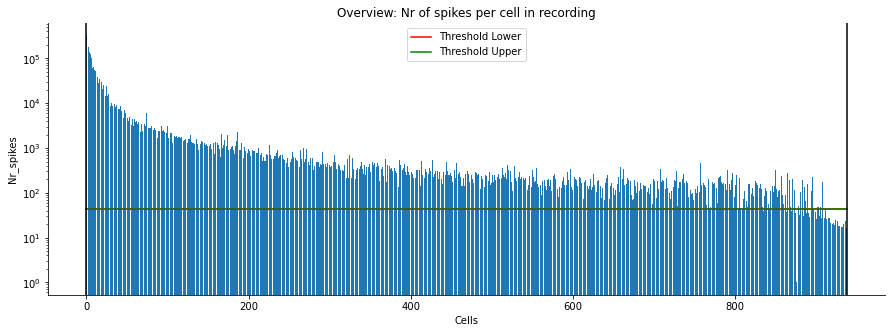

interactive(children=(IntText(value=43, description='Lower threshold:', style=DescriptionStyle(description_wid…

FloatText(value=0.6791005233769714, description='Lower threshold in spikes per minute:', style=DescriptionStyl…

interactive(children=(IntText(value=6152, description='Upper threshold:', style=DescriptionStyle(description_w…

FloatText(value=97.16191255627423, description='Upper threshold in spikes per minute:', style=DescriptionStyle…

interactive(children=(IntText(value=0, description='Left Threshold', style=DescriptionStyle(description_width=…

interactive(children=(IntText(value=938, description='Right Threshold', style=DescriptionStyle(description_wid…

In [15]:
reload(spike_extractor)
Spikes = spike_extractor.Recording_spikes(spikes_file.files[0])
thresholds = spike_extractor.Thresholds(Spikes.spikes, Test_stimulus)
overview = spike_plotly.Recording_overview(Spikes.spikes)
overview.plot_basic_recording_information(thresholds)

In [16]:
#Load spikes
from MEA_analysis import stimulus_and_spikes
reload(stimulus_and_spikes)
Spikes.define_subset(thresholds.threshold_left_widget.value, thresholds.threshold_right_widget.value)
Spikes.define_thr(thresholds.threshold_up_widget.value, thresholds.threshold_low_widget.value)
spikes_df = Spikes.get_spikes(True, True)[2]

#Correlate spikes and stimuli
begin_idx, end_idx = sp.spikes_and_stimulus(spikes_df, Test_stimulus.stimuli)
stimulus_spikes = sp.extract_stimulus_spikes(spikes_df, Test_stimulus.stimuli['Stimulus_name'], begin_idx, end_idx, np.array(Test_stimulus.stimuli['Begin_Fr'][:], dtype=int))

In [17]:
complete_dataframe = pd.DataFrame(columns=('Cell index', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus ID', 'Stimulus name', 'Spikes'))
row = 0

for cell in range(len(spikes_df)):
       
    for stimulus in range(len(stimulus_spikes)):
        nr_spikes_new = np.count_nonzero(~stimulus_spikes['Spikes'][stimulus][:, cell].mask)
        area_new =  spikes_df['Area'].loc[cell]* (nr_spikes_new/spikes_df['Nr of spikes'].loc[cell])
        complete_dataframe.loc[row] = [spikes_df['Cell index'].loc[cell], spikes_df['Centres x'].loc[cell],  spikes_df['Centres y'].loc[cell],
                                       nr_spikes_new, area_new, stimulus, 
                                       Test_stimulus.stimuli['Stimulus_name'][stimulus], stimulus_spikes['Spikes'][stimulus][:, cell]]
        row = row+1

        
multi_complete_dataframe = complete_dataframe.set_index(['Cell index', 'Stimulus ID', 'Centres x', 'Centres y', 'Nr of Spikes', 'Area', 'Stimulus name'])
complete_dataset = qgrid.show_grid(multi_complete_dataframe)
complete_dataset

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [18]:
stimulus_extr = single_stimulus.Single_stimulus_spikes(multi_complete_dataframe, Test_stimulus)

In [56]:
for idx, stim_index in enumerate(multi_complete_dataframe.index.unique(1)):
    sampling_freq, trigger_completes, repeat_logics, repeats, repeat_durations = Qi.create_full_logbook(Test_stimulus.stimuli)
    
    stimulus_spikes=multi_complete_dataframe.loc[((slice(None)), [stim_index]),:]
    Quality_df = single_stimulus.calculate_quality_index_only(stimulus_spikes, trigger_completes[stim_index],
                                                         int(repeat_logics[stim_index]),
                                                         sampling_freq)
    if idx==0:
        pd_parent=stimulus_spikes.copy()
    else:
        pd_parent=pd.concat([pd_parent, stimulus_spikes])

In [57]:
pd_parent

,,,,,,,Spikes,New_qi,total qc new
Cell index,Stimulus ID,Centres x,Centres y,Nr of Spikes,Area,Stimulus name,,,
1,0,504.580252,293.997270,22263,6.804969,FFF,"[27, 371, 543, 659, 1252, 1338, 1469, 1570, 16...",0.149852,4.232107
2,0,209.421313,756.085283,20989,6.415555,FFF,"[400, 466, 568, 721, 949, 991, 1083, 1323, 139...",0.144783,6.477348
3,0,756.609265,839.966196,17216,5.262289,FFF,"[490, 558, 928, 1038, 1160, 1184, 1211, 1317, ...",NaN,2.951600
4,0,1260.559240,1007.960307,11290,3.450932,FFF,"[144, 534, 649, 960, 1146, 1459, 1849, 2108, 2...",NaN,2.698144
5,0,42.005888,419.904893,8626,2.636647,FFF,"[21, 364, 435, 1497, 1563, 1875, 1914, 2890, 3...",0.127083,2.277491
...,...,...,...,...,...,...,...,...,...
934,6,499.768650,968.106150,2,0.000611,MB_600,"[5175476, 6724882, --, --, --, --, --, --, --,...",0.111071,0.000000
935,6,2643.141684,0.018526,0,0.000000,MB_600,"[--, --, --, --, --, --, --, --, --, --, --, -...",NaN,0.000000
936,6,2645.930313,840.003625,3,0.000917,MB_600,"[1493868, 2511625, 6760259, --, --, --, --, --...",0.111031,0.000000


In [25]:
start = time.time() 
Qi.calculate_qi(stimulus_df=Test_stimulus.stimuli, spikes_df=multi_complete_dataframe)
end = time.time()
print(end - start)

FFF 24.0
1 0.14985217667125644


C:\Users\George\Documents\GitHub\Basic_scripts\QI_logistics.py:43: RuntimeWarning:

invalid value encountered in double_scalars



MB_600 52.0
143 0.10795467042994214
286 0.11293980717044531
429 0.11029883003750036
572 0.1144045642807949
715 0.1100667497307543
858 0.5219651666868931
717.540598154068


In [26]:
test12=Qi.run_multi()

run_multi initialized


In [45]:
start = time.time() 
pd_parent=test12.run_multi(Test_stimulus.stimuli, multi_complete_dataframe)
end = time.time()
print(end - start)

409.9242100715637


### Main function, running for all selected stimuli the QI calculation.
#### currently deprecated, as dependecies changed. Results are the same with new implementation

###### Works well with Full-field stimuli and chirps, conservatively well with MBs, more testing needed.
###### If you'd like to time the calculation of time, make sure you // import time // and uncomment the three lines in the cell below

In [ ]:
def calculate_qi_old(cell_idces=None, kernel_width=0.0125, spikes_df=None):
    if not spikes_df:
        print('Give me a spikes_df')
        return
    
    offic_test=np.zeros(len(cell_idces)) 
    

        


    print(spikes_df.index[0][-1])
    stimulus_traits= Basic.get_stimulus_traits(Test_stimulus.stimuli, stim_idx)
    repeat_duration= np.floor((Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][stimulus_traits['stim_trials']]-Test_stimulus.stimuli.loc[stim_idx]['Trigger_Fr_relative'][0])
                              /Test_stimulus.sampling_frequency[0])
    print('Repeat duration:' , repeat_duration )


    gauswins=np.tile(kernel_template(width=kernel_width)[::-1], (stimulus_traits['stim_repeats'],1))


    for idx,cell in enumerate(cell_idces):
        if np.sum(spikes_df.loc[cell]['Spikes'].values[0].compressed())<1:
            offic_test[idx]=np.nan
            continue
        else:
            spikes = sp.get_spikes_whole_stimulus_trainsomitted(
                        spikes_df, stimulus_extr.trigger_complete,
                                     cell,
                                     int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                     Test_stimulus.sampling_frequency[0])
            
            if sum([len(spikes[i]) for i in range(len(spikes))])/stimulus_traits['stim_repeats']<10:
                offic_test[idx]=fast_qi_exclusive(spikes, stimulus_traits, repeat_duration)
                
            else:
            
            
                frames= int((repeat_duration+0.5)*int(Test_stimulus.sampling_frequency[0]))
                spiketimes=np.zeros((len(spikes), frames-1))
                exs=np.zeros((len(spikes), frames-gauswins.shape[1]))
                for trial in range(len(spikes)):
                    spiketimes= spike_padding_new(spiketimes, spikes, trial)
                exs=scipy.signal.oaconvolve(spiketimes, gauswins, mode='valid', axes=1)
                offic_test[idx]=calc_tradqi(exs)

        if idx%1000==0:
            print(cell_idces[idx], offic_test[idx])
    stimulus_extr.spikes_stimulus['New_qi']=offic_test
    Quality_df = single_stimulus.calculate_quality_index(stimulus_extr.spikes_stimulus, stimulus_extr.trigger_complete,
                                                         int(stimulus_extr.stimulus_info["Stimulus_repeat_logic"]),
                                                         Test_stimulus.sampling_frequency[0])    
    return stimulus_extr.spikes_stimulus
        

In [391]:
stimulus_extr.load_spikes_for_stimulus(0)
chosen_ones= stimulus_extr.spikes_stimulus.index.get_level_values(0).values

for idx, stimulus_idx in enumerate(range(2, len(Test_stimulus.stimuli))):
    #start = time.time()    
    scripting=calculate_qi(stimulus_extr, stimulus_idx, chosen_ones)
    if idx==0:
        pd_parent=scripting.copy()
    else:
        pd_parent=pd.concat([pd_parent, scripting])
    #end = time.time()
    #print(end - start)

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



MB_1000
Repeat duration: 32.0
1008 0.11584404725820605


<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



2008 0.10987171050337918
3008 0.11078474817974959
4008 0.10934875128175918
5008 0.1109371122532871
632.9314260482788
MB_1200
Repeat duration: 28.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.12184103105503008
2008 0.1100992549756012
3008 0.10980911351016984
4008 0.11029054145511645
5008 0.11081272214529495
449.5523383617401
MB_800
Repeat duration: 36.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10725220060755011
2008 0.11022101809444129
3008 0.11064695049761916
4008 0.11076299065099234
5008 0.11093705088105181
538.9763462543488
MB_1400
Repeat duration: 24.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.

<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10762990650992205
2008 0.11058893042093285
3008 0.11067596053596257
4008 0.11085002076602193
5008 0.11102408099608148
348.93238282203674
MB_600
Repeat duration: 52.0


C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



7 0.17254137282342336


<ipython-input-343-a115929bc3c0>:31: RuntimeWarning:

invalid value encountered in double_scalars



1008 0.10971684457677527
2008 0.1104282594393394
3008 0.1109102723841194
4008 0.11095044012951766
5008 0.11103077562031445
715.4125628471375


### Comparing visually cells detected with old vs additions w new qi

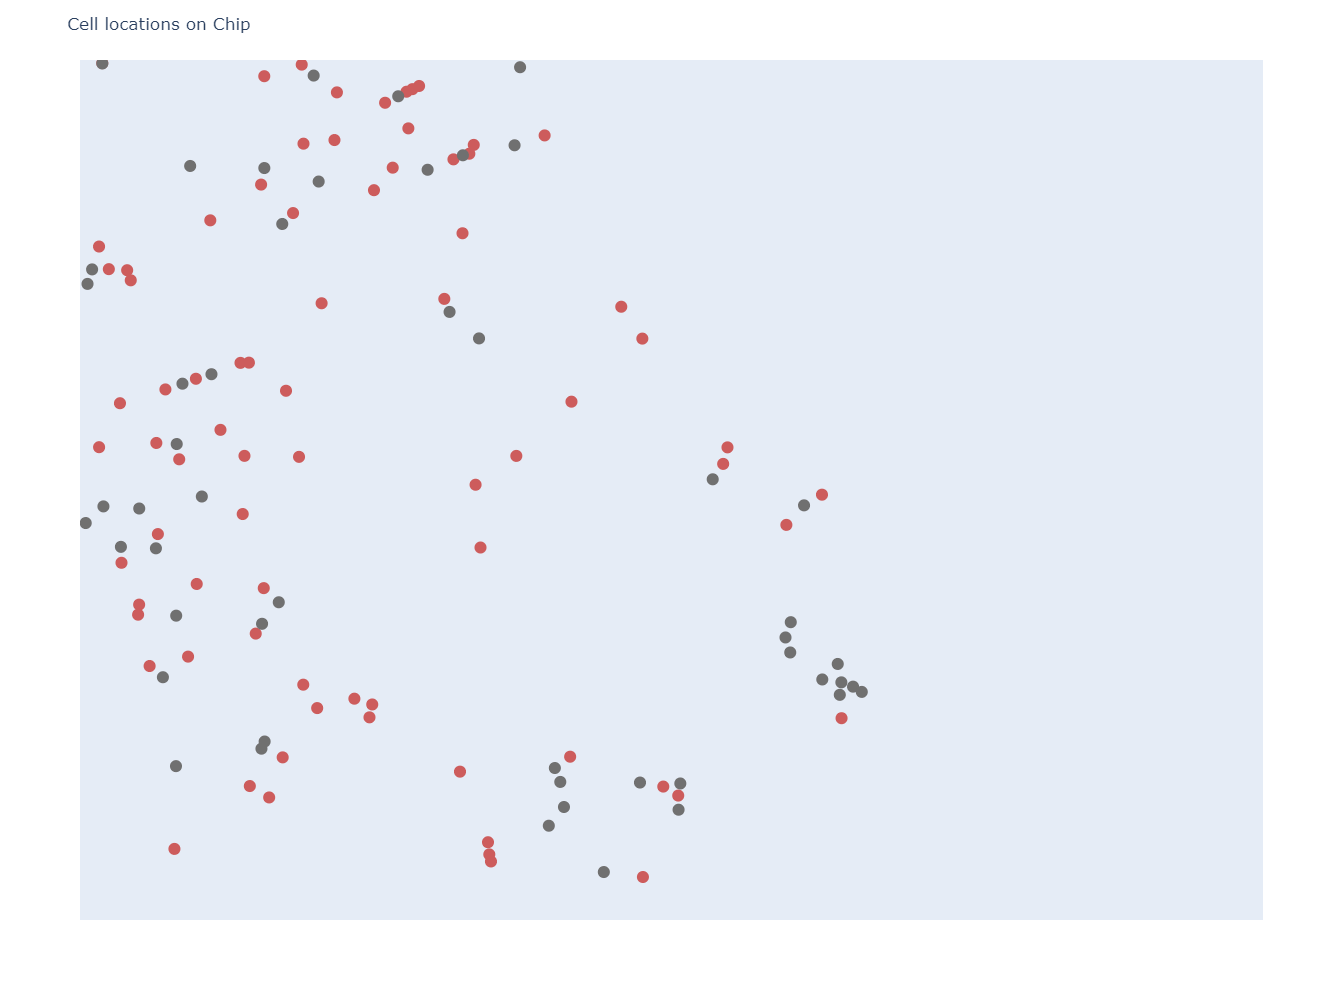

In [65]:
chip_image(2, 0.15, pd_parent, 'FFF', 'end_inspection', save_name=Test_stimulus.recording_folder+"End_inspection", tosave=True)

#### Check how many values pass a stimulus-specific threshold

In [67]:
passing_threshold=0.15
for_stimulus="FFF"
sum((pd_parent.xs(for_stimulus, level="Stimulus name")['New_qi'])>passing_threshold)

117

#### Plot old (x) vs new (y) QI for each cell, with hover info about cell index and number of spikes

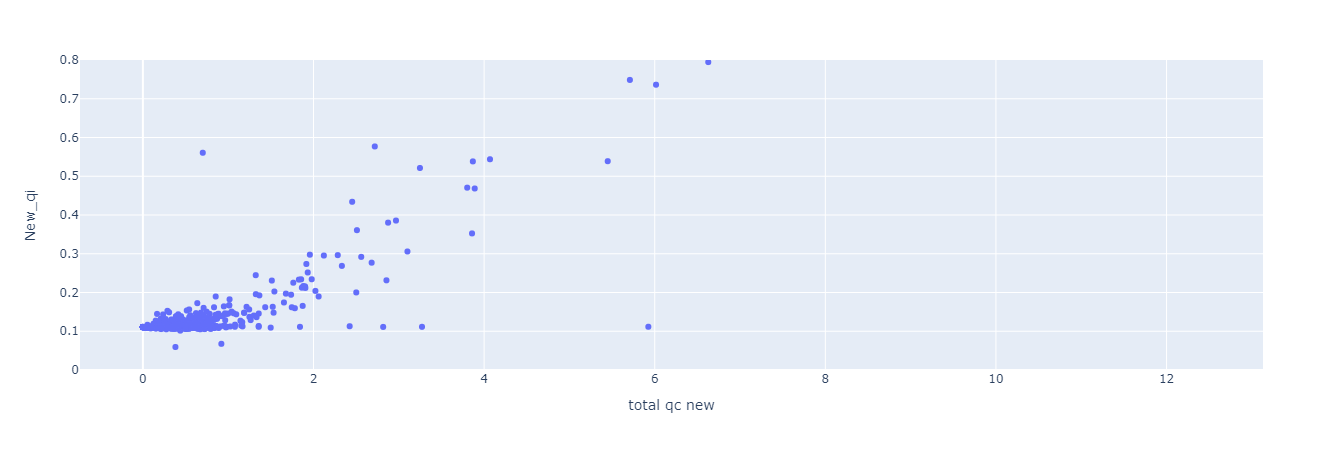

In [68]:
fig = px.scatter(pd_parent.xs("MB_1000", level="Stimulus name").reset_index(), x="total qc new", y="New_qi", 
                 hover_name="Cell index", hover_data=["Nr of Spikes"])
fig.update_yaxes(range=[0, .8])
fig.show()

#### Structuring dataframe in Overview.Dataframe - compatible configuration, while throwing away or columns but Spikes/New_qi/Total qc new

In [188]:
pd_parent.to_pickle(Test_stimulus.recording_folder+"spikes_for_overview", compression="zip")
Test_stimulus.stimuli.to_pickle(Test_stimulus.recording_folder+"stimulus_overview", compression="zip")

In [69]:
condition1=((pd_parent.xs("FFF", level="Stimulus name")['New_qi'])>0.155)
condition2=((pd_parent.xs("FFF", level="Stimulus name")['total qc new'])<2)
pd_parent.xs("FFF", level="Stimulus name")[condition1&condition2]

,,,,,,Spikes,New_qi,total qc new
Cell index,Stimulus ID,Centres x,Centres y,Nr of Spikes,Area,,,
25,0,0.084104,41.922112,59,0.018034,"[71412, 142818, 214224, 285648, 357045, 428451...",0.391201,1.227200
136,0,1260.396536,373.706094,341,0.104231,"[15378, 43473, 45464, 81074, 88156, 89194, 113...",0.177666,1.792816
158,0,2225.922744,1133.552419,145,0.044321,"[10687, 82361, 84992, 86330, 148516, 150323, 1...",0.168939,1.568665
179,0,2356.682131,431.332755,134,0.040959,"[148198, 148239, 149801, 149891, 219590, 21962...",0.210460,1.553655
180,0,1511.444438,171.679553,236,0.072136,"[76741, 78619, 78667, 79749, 81284, 81325, 146...",0.217036,1.532055
...,...,...,...,...,...,...,...,...
783,0,1447.122798,369.615502,43,0.013143,"[186979, 382621, 542112, 612856, 685462, 97071...",0.161757,1.346180
784,0,664.646718,100.016868,63,0.019257,"[38741, 111203, 111986, 112884, 183489, 186871...",0.163783,1.935151
806,0,407.771391,675.876432,48,0.014672,"[76705, 76733, 77010, 77676, 118096, 218484, 5...",0.160270,1.064981


#### Create a zipper between stimuli index/phase duration/and bool homogeneity (for example FFF are alignable for trial, Chirp is not) so you get all plots per cell

In [44]:
stim_idxs=[0, 1, 2, 3]
phase_durs=[4, 78, 4, 3.5]
inhomos=[False, True, False, False]
colors=['#FE7C7C', '#FAFE7C', '#8AFE7C', '#7CFCFE', '#7C86FE', '#FE7CFE']

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



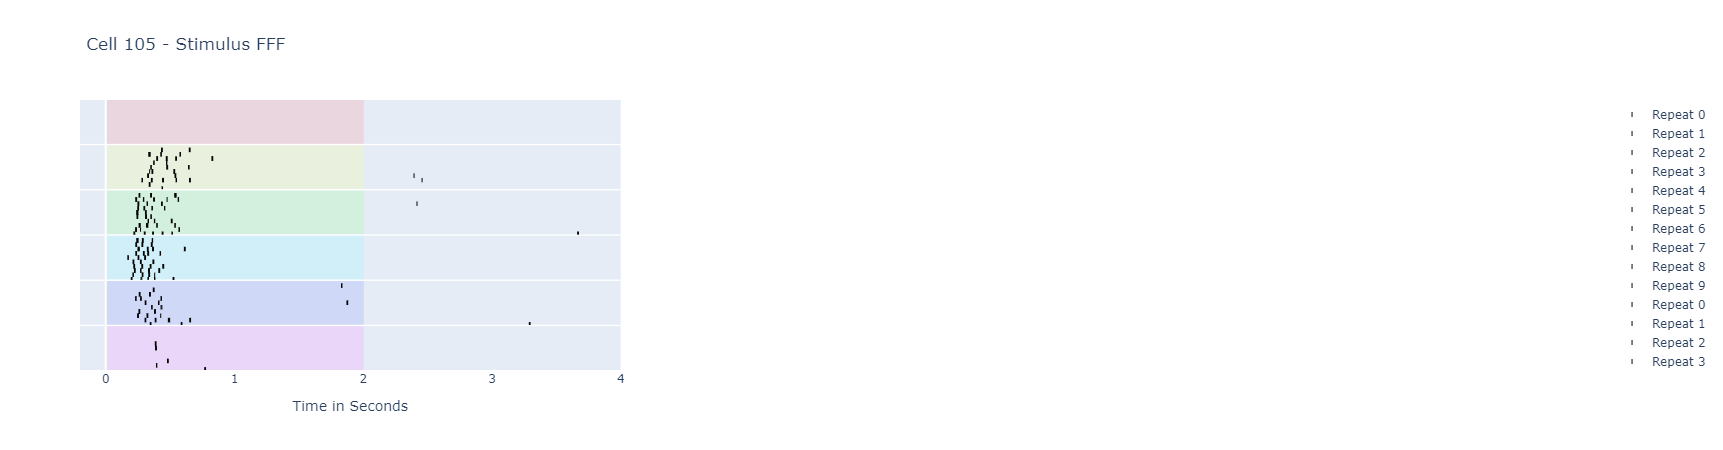

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



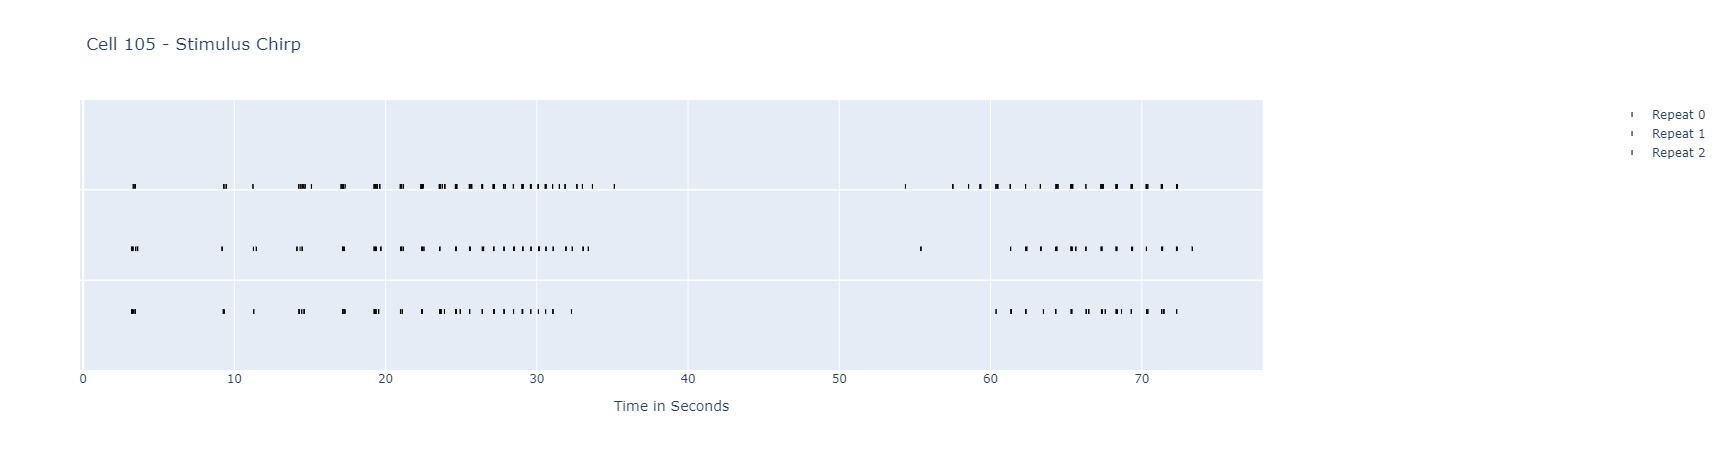

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



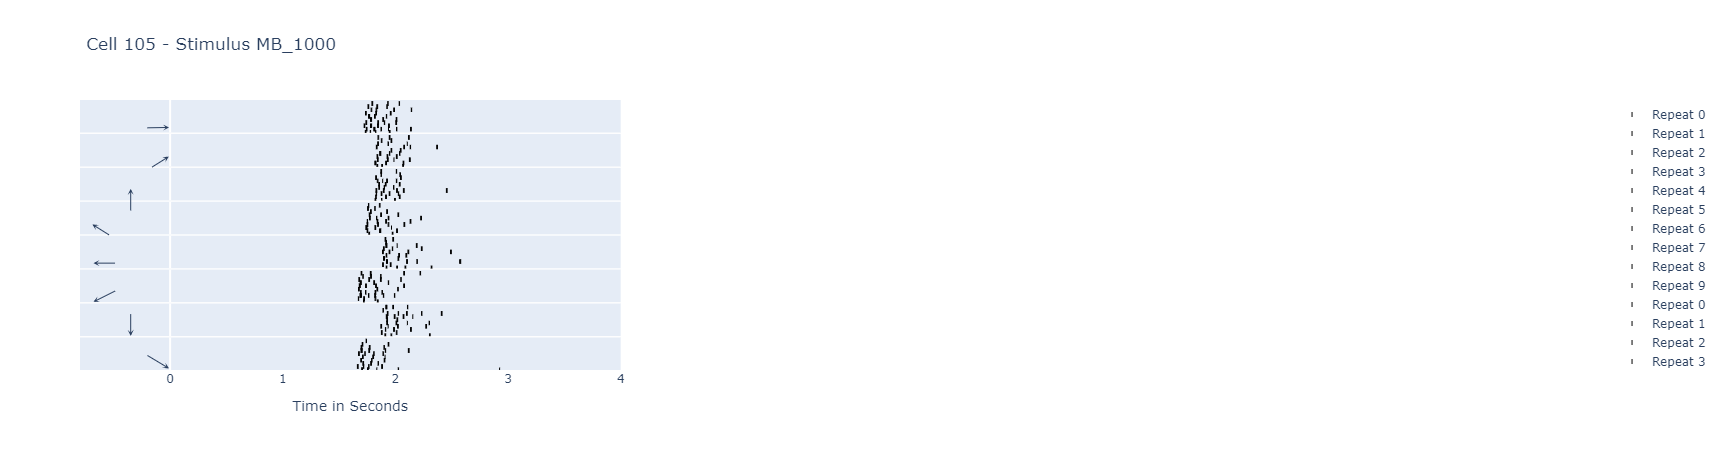

C:\Users\George\anaconda3\envs\DataJoint\lib\site-packages\qgrid\grid.py:1329: FutureWarning:

inplace is deprecated and will be removed in a future version.



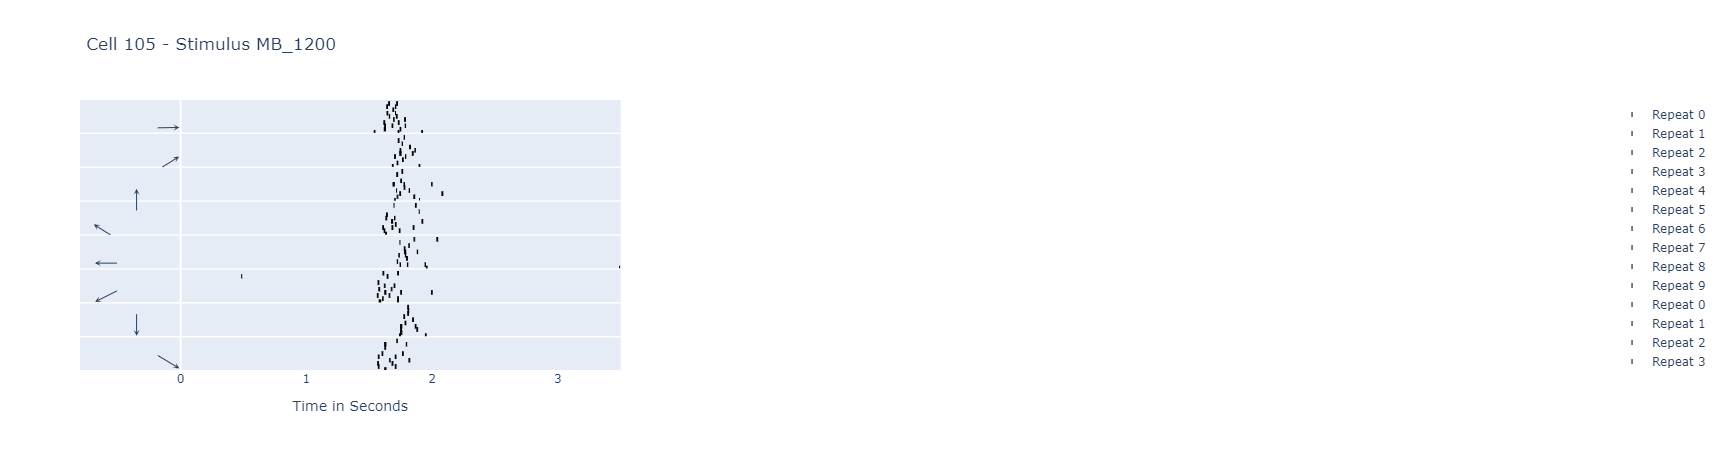

In [322]:
cell_of_int= 105#186#266#241#4054#547#2718#2875
for stim_idx, phase_dur, inhomo in zip(stim_idxs,phase_durs,inhomos):
    stimulus_extr.load_spikes_for_stimulus(stim_idx)
    stimulus_traits=Basic.get_stimulus_traits(Test_stimulus.stimuli, stim_idx)

    cell_spikes=Basic.kerberos_spiketrains_per_stimulus(cell_of_int, stimulus_extr.spikes_stimulus, stimulus_traits, phase_dur, Test_stimulus.sampling_frequency[0], inhomo)
    figure=Basic.plot_sc_aligned_new(cell_of_int, cell_spikes, stimulus_traits, phase_dur, colors)
    figure.show()